Imports

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

1. Load wine data from the two source files winequality-red.xlsx and winequalitywhite.xslx

In [230]:
red_wine = pd.read_excel('data/winequality-red.xlsx', header = 1,index_col=None)
white_wine = pd.read_excel('data/winequality-white.xlsx', header=1,index_col=None)

In [231]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [232]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [233]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [234]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Aggregate the excel files, while keeping the identity of each wine

In [235]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'


In [236]:
df = pd.concat([red_wine, white_wine])
df['wine_type'] = df['wine_type'].astype(str)

In [237]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Data exploration

4. Explore the features of the original and the new files:
a. number of rows and columns
b. type of data in each column

In [238]:
df.shape

(6497, 13)

In [239]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

5. Calculate the descriptive statistics of the numeric data


In [240]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


6. Plot diagrams that visualize the differences in red and white wine samples

General overview of all data from both white wine and red wine in a histogram.

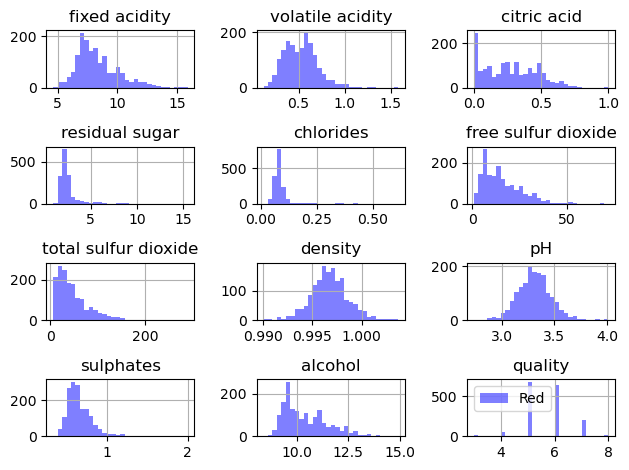

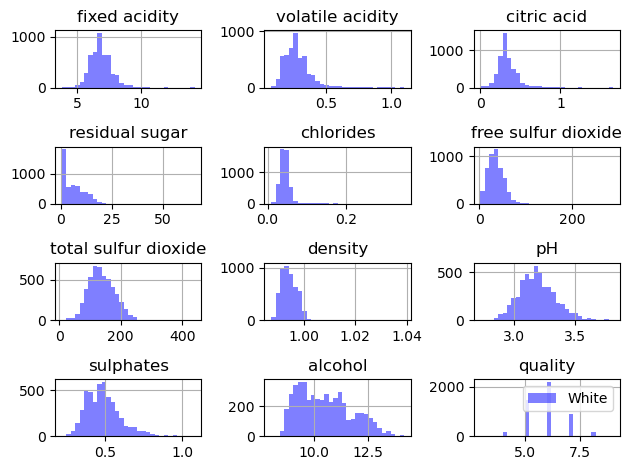

In [241]:
df[df['wine_type'] == 'red'].hist(alpha=0.5, color='blue', bins=30, label='Red')
plt.legend()
plt.tight_layout()
df[df['wine_type'] == 'white'].hist(alpha=0.5, color='blue', bins=30, label='White')
plt.legend()
plt.tight_layout()

plt.show()

Comparing specific values, in this case using a boxplot.
Examples being Alchohol and Quality.

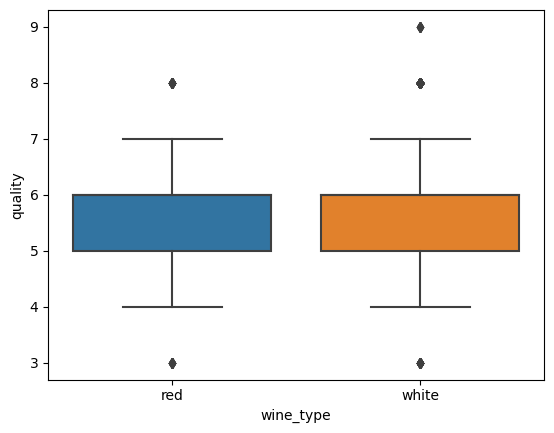

In [242]:
sns.boxplot(x='wine_type',y='quality',data=df)
plt.show()

While boxplot may not be the ideal diagram to discern small differences, we can still notice a small difference in quality, with white wine taking the lead.

C:\Users\AxiiS\AppData\Local\Temp\ipykernel_25112\57021086.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='wine_type', y='alcohol', data=sample_df, color='red', estimator=np.mean, ci=None)


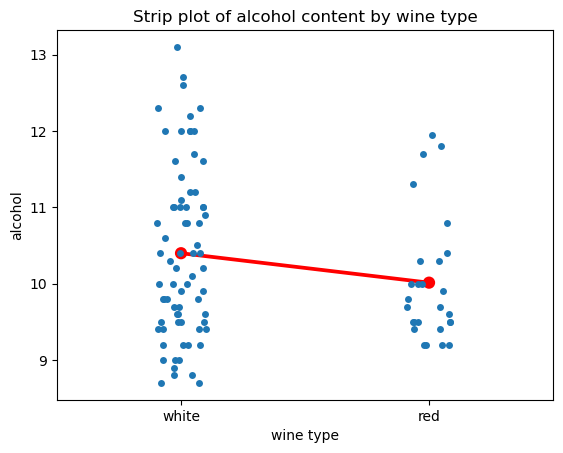

In [243]:
sample_df = df.sample(100)

sns.stripplot(x='wine_type',y='alcohol',data=sample_df,jitter=True)
sns.pointplot(x='wine_type', y='alcohol', data=sample_df, color='red', estimator=np.mean, ci=None)
plt.xlabel('wine type')
plt.ylabel('alcohol')
plt.title('Strip plot of alcohol content by wine type')
plt.show()

taking only a sample of 100, we can notice red wine having a higher average when it comes to alcohol content. Average is represented by the red dots.

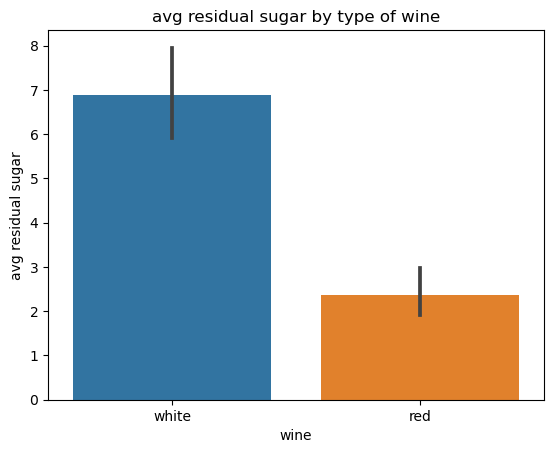

In [244]:
sns.barplot(x='wine_type',y='residual sugar',data=sample_df)
plt.xlabel('wine')
plt.ylabel('avg residual sugar')
plt.title('avg residual sugar by type of wine')
plt.show()


We can notice by using this barplot, that white wine has significantly higher content of residual sugar, on average.

#### Any other questions that might be of interest to wine consumers or distributers:

**Is there a correlation between residual sugar content and alcohol content?**

**Is there a correlation between residual sugar, alcohol and quality?**

#### Split the aggregated data into five subsets by binning the attribute pH. Identify the subset with the highest density.
#### What if you split the data in ten subsets?

Split into 5 bins:

In [245]:
ph_bins_5 = pd.cut(df['pH'], bins=5,labels=False)

subsets_5 = [df[ph_bins_5 == x] for x in range(5)]
subsets_5

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 86              8.6              0.49         0.28             1.9      0.110   
 91              8.6              0.49         0.28             1.9      0.110   
 92              8.6              0.49         0.29             2.0      0.110   
 151             9.2              0.52         1.00             3.4      0.610   
 440            12.6              0.31         0.72             2.2      0.072   
 ...             ...               ...          ...             ...        ...   
 4806            6.6              0.28         0.09            10.9      0.051   
 4807            6.0              0.17         0.30             7.3      0.039   
 4816            6.1              0.41         0.20            12.6      0.032   
 4855            7.1              0.23         0.39            13.7      0.058   
 4856            7.1              0.23         0.39            13.7      0.058   
 
       free su

Split into 10 bins:

In [246]:
ph_bins_10 = pd.cut(df['pH'],bins=10,labels=False)
subsets_10 = [df[ph_bins_10 == x] for x in range(10)]
subsets_10

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 151             9.2              0.52         1.00            3.40      0.610   
 1214            9.7              0.24         0.45            1.20      0.033   
 1758            9.6              0.21         0.28            1.20      0.038   
 1900           10.0              0.23         0.27           14.10      0.033   
 1959            8.5              0.17         0.31            1.00      0.024   
 1960            8.5              0.17         0.31            1.00      0.024   
 2162            9.9              0.49         0.23            2.40      0.087   
 2956            8.1              0.12         0.38            0.90      0.034   
 2959            7.3              0.40         0.26            5.45      0.016   
 3714            8.5              0.18         0.30            1.10      0.028   
 3762            7.4              0.20         0.35            6.10      0.025   
 3831           

Finding the highest density

In [247]:
max_densities = [subset['density'].max() for subset in subsets_5]

index_of_max_density = max_densities.index(max(max_densities))

subset_with_max_density = subsets_5[index_of_max_density]
subset_with_max_density

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white
4892,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Either I'm interpreting this wrong or the code is off. This code is even written almost entirely by AI because I could not get it to work, and I'm still unsure.

#### Heat map: Which attribute has the biggest infuence on the quality of wine?

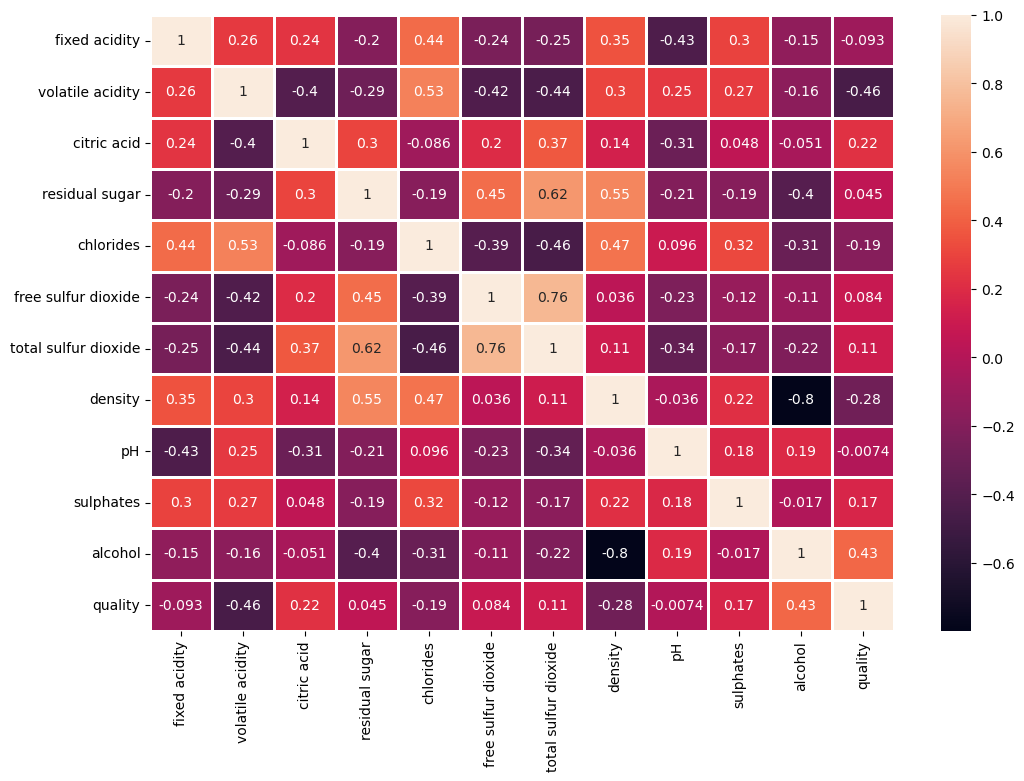

In [248]:
num_samp_df = sample_df.select_dtypes(include=['float64', 'int64'])
nsdf_corr = num_samp_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(nsdf_corr,annot=True,linewidths=1)
plt.show()

#### Based on the sample of a 100: 
Highest influence on quality: Alcohol


Lowest influence on quality: Citric acid.

Lowest / highest influcence: 0 would be no influence. - or + both increase influence.

0.4 would be same influence as -0.4.



### Based on red wine:

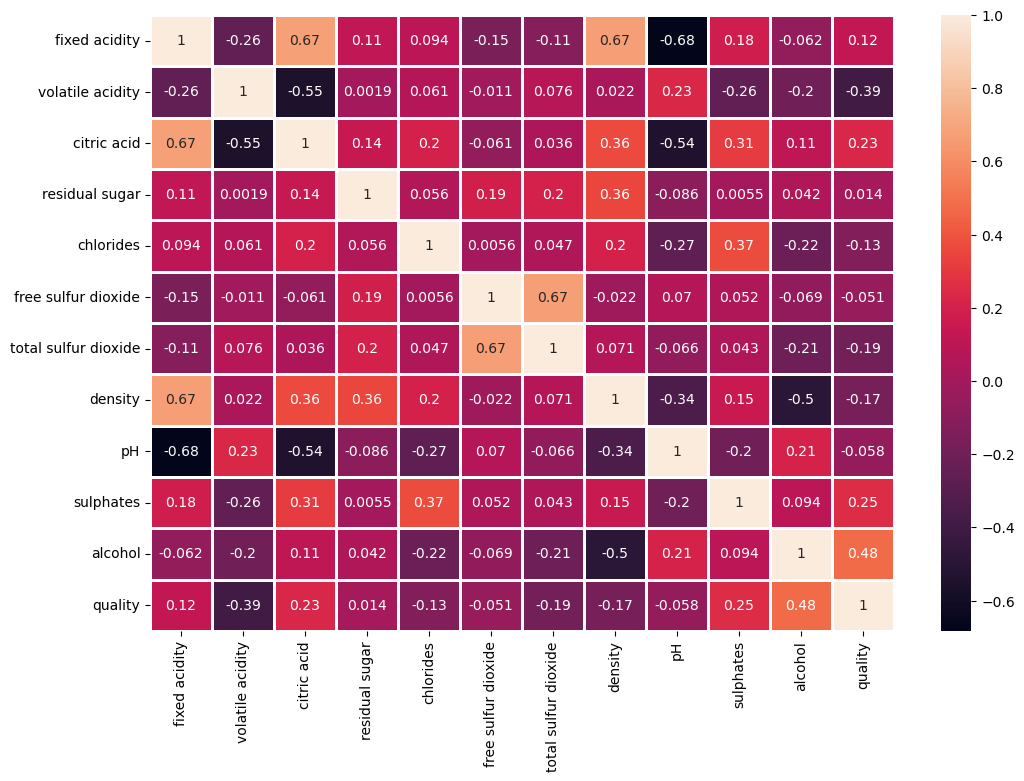

In [249]:
num_samp_df = red_wine.select_dtypes(include=['float64', 'int64'])
nsdf_corr = num_samp_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(nsdf_corr,annot=True,linewidths=1)
plt.show()

Highest influence on quality: Alcohol

Lowest influence on quality: Residual sugar

Lowest / highest influcence: 0 would be no influence. - or + both increase influence.

0.4 would be same influence as -0.4.

### Based on white wine:

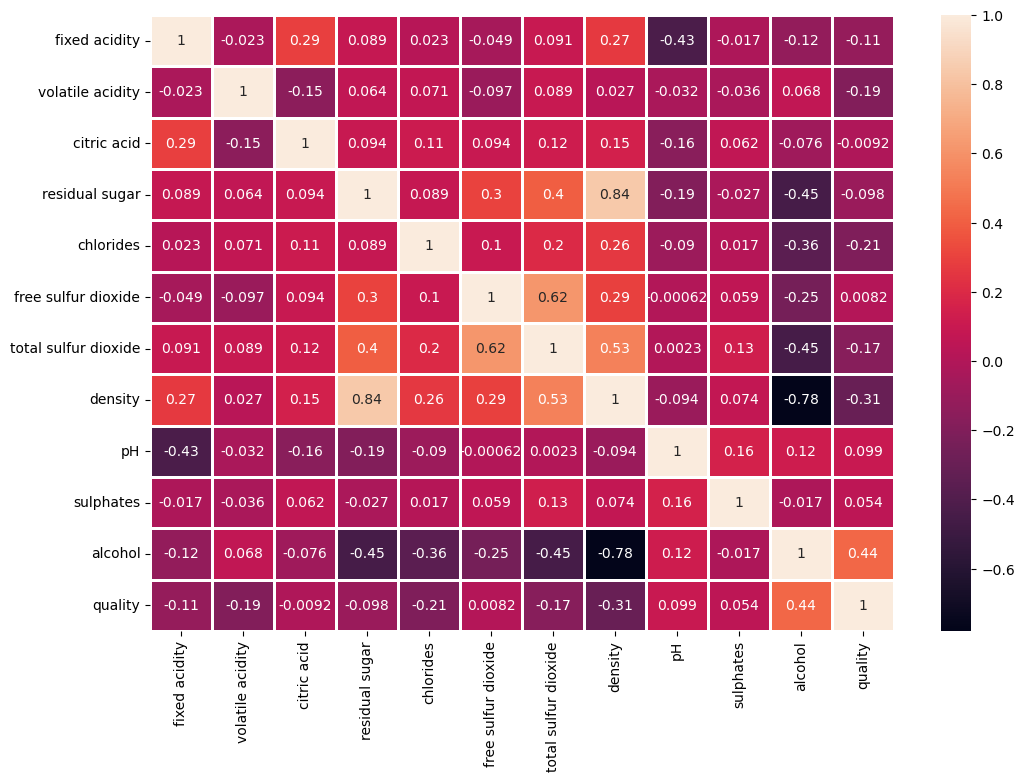

In [250]:
num_samp_df = white_wine.select_dtypes(include=['float64', 'int64'])
nsdf_corr = num_samp_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(nsdf_corr,annot=True,linewidths=1)
plt.show()

Highest influence on quality: Alcohol


Lowest influence on quality: free sulfur dioxide

Lowest / highest influcence: 0 would be no influence. - or + both increase influence.

0.4 would be same influence as -0.4.

#### Prepare the data for further analysis

**Explore the feature 'residual sugar'**.

 Is there any outlier(a value much differen from the rest)? on which row is it found? 

Initially we can see an outlier, the max of 65.8, which is quite abit above the rest.

In [251]:
df['residual sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

The row with the highest amount of residal sugar, 2781.

In [252]:
df.loc[df['residual sugar'].idxmax()]

fixed acidity               7.8
volatile acidity          0.965
citric acid                 0.6
residual sugar             65.8
chlorides                 0.074
free sulfur dioxide         8.0
total sulfur dioxide      160.0
density                 1.03898
pH                         3.39
sulphates                  0.69
alcohol                    11.7
quality                       6
wine_type                 white
Name: 2781, dtype: object

Removing said row(followed by proof that it is indeed gone):

In [253]:
df.drop(df['residual sugar'].idxmax(), inplace=True)
df.loc[df['residual sugar'].idxmax()]
#Outlier removed.

fixed acidity              7.9
volatile acidity          0.33
citric acid               0.28
residual sugar            31.6
chlorides                0.053
free sulfur dioxide       35.0
total sulfur dioxide     176.0
density                 1.0103
pH                        3.15
sulphates                 0.38
alcohol                    8.8
quality                      6
wine_type                white
Name: 1653, dtype: object

#### Identify the attribute with the lowest correlation to the wine quality and remove it

Using the correlation matrix from earlier, we can deduce that the lowest correlation to the quality of the wine is: Citric acid.

In [254]:
#removing the citric acid column
df.drop('citric acid',axis=1)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


#### Transform the categorical data into numeric

In [255]:
#one-hot encoding...
#df = pd.get_dummies(df,columns=['wine_type'])
#df = df['wine_type'].astype(int)
# recursion error..
#df['wine_type'] = df['wine_type'].astype(str).replace({'red': 0, 'white': 1})
#I had so many errors with figuring this out. I'm gonna let this be. 
#Nothing worked because the red/white was made into a Series instead of a str. Forced it into a string to fix problem.
df['wine_type'] = df['wine_type'].map({'red': 0, 'white': 1})
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [256]:
print(df['wine_type'].apply(type).unique())

[<class 'int'>]


In [257]:
print(df['wine_type'].value_counts())

wine_type
1    4897
0    1599
Name: count, dtype: int64


Try to reduce the number of features of the aggregated data set by applying principal
component analysis (PCA). What is the optimal number of components?


In [260]:
stdScaler = StandardScaler()
scale_transformed_df = stdScaler.fit_transform(df)
scale_transformed_df
#Data is hereby standardized.


array([[ 0.14253396,  2.19168464, -2.19299869, ..., -0.91531008,
        -0.93712859, -1.75001117],
       [ 0.4510775 ,  3.2862188 , -2.19299869, ..., -0.57991336,
        -0.93712859, -1.75001117],
       [ 0.4510775 ,  2.55652936, -1.91766056, ..., -0.57991336,
        -0.93712859, -1.75001117],
       ...,
       [-0.55168901, -0.6054582 , -0.88514257, ..., -0.91531008,
         0.20801575,  0.57142492],
       [-1.32304786, -0.30142093, -0.12796272, ...,  1.93556199,
         1.35316009,  0.57142492],
       [-0.93736844, -0.78788056,  0.42271354, ...,  1.09707021,
         0.20801575,  0.57142492]])

In [ ]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(scale_transformed_df)


VSCode crashed and i lost the remaining code / diagrams. I'm not doing it again.

TL;DR: 
pca, 12PC columns, cumulative explained variance (0.8) lead me to believe 5-6 components is optimal.